In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

# import PyNIO as Nio # deprecated
import xarray as xr
import pandas
import glob
from copy import deepcopy
from scipy.stats import *
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from area_mean import *
from binned_cyFunctions5 import *
from read_hs_file import read_var_mod

from get_LWPCMIP5data import *
from get_LWPCMIP6data import *
from useful_func_cy import *


In [2]:
# Model list (Global Climate Model);

exp = 'piControl'

# CMIP6: 31 (30: BCCCSMCM2MR)
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCCSMCM2MR = {'modn': 'BCC-CSM2-MR', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CMCCCM2SR5 = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6', 
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCMFV2 = {'modn': 'CESM2-WACCM-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CNRMCM61 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMCM61HR = {'modn': 'CNRM-CM6-1-HR', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMESM21 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

ECEarth3 = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
ECEarth3Veg = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE22G = {'modn': 'GISS-E2-2-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
# HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
#             'exper': 'piControl', 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}   #..missing 'wap' in 'piControl' exp(Daniel says that HadGEM3-GC31 not using p-level, so doesn't have variables on p-level
INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6', 
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
MIROCES2L = {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NESM3 = {'modn': 'NESM3', 'consort': 'NUIST', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NorESM2MM = {'modn': 'NorESM2-MM', 'consort': 'NCC', 'cmip': 'cmip6',
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
SAM0 = {'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6', 
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
TaiESM1 = {'modn': 'TaiESM1', 'consort': 'AS-RCEC', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

# CMIP5: 20 (18, ACCESS10, ACCESS13)
ACCESS10 = {'modn': 'ACCESS1-0', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
ACCESS13 = {'modn': 'ACCESS1-3', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
BNUESM = {'modn': 'BNU-ESM', 'consort': 'BNU', 'cmip': 'cmip5',
          'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

CCSM4 = {'modn': 'CCSM4', 'consort': 'NCAR', 'cmip': 'cmip5',
             'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CNRMCM5 = {'modn': 'CNRM-CM5', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CSIRO_Mk360 = {'modn': 'CSIRO-Mk3-6-0', 'consort': 'CSIRO-QCCCE', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CanESM2 = {'modn': 'CanESM2', 'consort': 'CCCma', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSg2 = {'modn': 'FGOALS-g2', 'consort': 'LASG-CESS', 'cmip': 'cmip5',   # missing 'prw' in piControl
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSs2 = {'modn': 'FGOALS-s2', 'consort': 'LASG-IAP', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLCM3 = {'modn': 'GFDL-CM3', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2H = {'modn': 'GISS-E2-H', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2R = {'modn': 'GISS-E2-R', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
IPSLCM5ALR = {'modn': 'IPSL-CM5A-LR', 'consort': 'IPSL', 'cmip': 'cmip5',
               'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MIROC5 = {'modn': 'MIROC5', 'consort': 'MIROC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMMR = {'modn': 'MPI-ESM-MR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
NorESM1M = {'modn': 'NorESM1-M', 'consort': 'NCC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

MIROCESM = {'modn': 'MIROC-ESM', 'consort': 'MIROC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MRICGCM3 = {'modn': 'MRI-CGCM3', 'consort': 'MRI', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMLR = {'modn': 'MPI-ESM-LR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
bcccsm11 = {'modn': 'bcc-csm1-1', 'consort': 'BCC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2G = {'modn': 'GFDL-ESM2G', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2M = {'modn': 'GFDL-ESM2M', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}


In [3]:
deck2 = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM21, CNRMCM61HR, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0, E3SM10, FGOALSg3, GFDLCM4, CAMSCSM1, INM_CM48, MPIESM12LR, AWICM11MR, CMCCCM2SR5, CESM2WACCMFV2, CNRMCM61, ECEarth3, ECEarth3Veg, GISSE22G, MIROCES2L, NESM3, NorESM2MM, TaiESM1, BNUESM, CCSM4, CNRMCM5, CSIRO_Mk360, CanESM2, FGOALSg2, FGOALSs2, GFDLCM3, GISSE2H, GISSE2R, IPSLCM5ALR, MIROC5, MPIESMMR, NorESM1M, MIROCESM, MRICGCM3, MPIESMLR, bcccsm11, GFDLESM2G, GFDLESM2M]   # current # 30 (no.19) + 20 = 50
deck_nas2 = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM21', 'CNRMCM61HR', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0', 'E3SM10', 'FGOALSg3', 'GFDLCM4', 'CAMSCSM1', 'INM_CM48', 'MPIESM12LR', 'AWICM11MR', 'CMCCCM2SR5', 'CESM2WACCMFV2', 'CNRMCM61', 'ECEarth3', 'ECEarth3Veg', 'GISSE22G', 'MIROCES2L', 'NESM3', 'NorESM2MM', 'TaiESM1', 'BNUESM', 'CCSM4', 'CNRMCM5', 'CSIRO_Mk360', 'CanESM2', 'FGOALSg2', 'FGOALSs2', 'GFDLCM3', 'GISSE2H', 'GISSE2R', 'IPSLCM5ALR', 'MIROC5', 'MPIESMMR', 'NorESM1M', 'MIROCESM', 'MRICGCM3', 'MPIESMLR', 'bcccsm11', 'GFDLESM2G', 'GFDLESM2M']

deck3 = [CanESM5, E3SM10, CESM2FV2, CESM2, CNRMCM61, CESM2WACCMFV2, CNRMESM21, NESM3, IPSLCM6ALR, CESM2WACCM, MIROCESM, TaiESM1, ECEarth3Veg, CNRMCM61HR, ECEarth3, 
         FGOALSs2, IPSLCM5ALR, CSIRO_Mk360, BNUESM, GFDLCM3, GFDLCM4, SAM0, CanESM2, MPIESMLR, CMCCCM2SR5, MPIESMMR, FGOALSg2, BCCESM1, CNRMCM5, AWICM11MR, MRIESM20, 
          GISSE21H, MPIESM12LR, CCSM4, NorESM1M, FGOALSg3, bcccsm11, MIROC5, GISSE21G, MIROCES2L, MRICGCM3, MIROC6, NorESM2MM, GFDLESM2M, GFDLESM2G, GISSE22G, GISSE21H, CAMSCSM1, GISSE2R, INM_CM48]

deck3_nas = ['CanESM5', 'E3SM10', 'CESM2FV2', 'CESM2', 'CNRMCM61', 'CESM2WACCMFV2', 'CNRMESM21', 'NESM3', 'IPSLCM6ALR', 'CESM2WACCM', 'MIROCESM', 'TaiESM1', 'ECEarth3Veg', 'CNRMCM61HR', 'ECEarth3', 
         'FGOALSs2', 'IPSLCM5ALR', 'CSIRO_Mk360', 'BNUESM', 'GFDLCM3', 'GFDLCM4', 'SAM0', 'CanESM2', 'MPIESMLR', 'CMCCCM2SR5', 'MPIESMMR', 'FGOALSg2', 'BCCESM1', 'CNRMCM5', 'AWICM11MR', 'MRIESM20', 
          'GISSE21H', 'MPIESM12LR', 'CCSM4', 'NorESM1M', 'FGOALSg3', 'bcccsm11', 'MIROC5', 'GISSE21G', 'MIROCES2L', 'MRICGCM3', 'MIROC6', 'NorESM2MM', 'GFDLESM2M', 'GFDLESM2G', 'GISSE22G', 'GISSE21H', 'CAMSCSM1', 'GISSE2R', 'INM_CM48']


# Calculate 5*5 bin array for variables (LWP, CCFs) in Sounthern Ocean Region:
#..set are-mean range and define function
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) +2.5  #..southern-ocaen latitude edge: 9

path1 = '/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/'
path6 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/plot_file/'

In [101]:
model_data = MRIESM20
# get variable data
if model_data['cmip'] == 'cmip6':

    inputVar_pi, inputVar_abr = get_LWPCMIP6(**model_data)

elif model_data['cmip'] == 'cmip5':

    inputVar_pi, inputVar_abr = get_LWPCMIP5(**model_data)
else:
    print('not cmip6 & cmip5 data.')

MRI-ESM2-0
1
/glade/scratch/chuyan/CMIP6data/
['/glade/scratch/chuyan/CMIP6data/pr_Amon_MRI-ESM2-0_abrupt-4xCO2_r1i1p1f1_gn_185001-200012.nc']
 Variable pr   abrupt-4xCO2
type of dataOUT in read_hs_file <class 'numpy.ma.core.MaskedArray'>
(1812, 160, 320)
retrieve time:  [1850, 1, 1] [1999, 12, 31]
MRI-ESM2-0
1
/glade/scratch/chuyan/CMIP6data/
['/glade/scratch/chuyan/CMIP6data/ts_Amon_MRI-ESM2-0_abrupt-4xCO2_r1i1p1f1_gn_185001-200012.nc']
 Variable ts   abrupt-4xCO2
type of dataOUT in read_hs_file <class 'numpy.ma.core.MaskedArray'>
(1800, 160, 320)
MRI-ESM2-0
1
/glade/scratch/chuyan/CMIP6data/
['/glade/scratch/chuyan/CMIP6data/ta_Amon_MRI-ESM2-0_abrupt-4xCO2_r1i1p1f1_gn_200001-200012.nc', '/glade/scratch/chuyan/CMIP6data/ta_Amon_MRI-ESM2-0_abrupt-4xCO2_r1i1p1f1_gn_185001-189912.nc', '/glade/scratch/chuyan/CMIP6data/ta_Amon_MRI-ESM2-0_abrupt-4xCO2_r1i1p1f1_gn_190001-194912.nc', '/glade/scratch/chuyan/CMIP6data/ta_Amon_MRI-ESM2-0_abrupt-4xCO2_r1i1p1f1_gn_195001-199912.nc']
 Variable ta 

In [102]:
# def calc_Radiation_LRM_2(inputVar_pi, inputVar_abr, **model_data):

# inputVar_pi, inputVar_abr are the data from read module: get_CMIP6data.py

#..get the shapes of monthly data
shape_lat = len(inputVar_pi['lat'])
shape_lon = len(inputVar_pi['lon'])
shape_time_pi = len(inputVar_pi['times'])
shape_time_abr = len(inputVar_abr['times'])
#print(shape_lat, shape_lon, shape_time_pi, shape_time_abr)


#..choose lat 40 -85 °S as the Southern-Ocean Regions
lons = inputVar_pi['lon'] *1.
lats = inputVar_pi['lat'][:] *1.

levels = np.array(inputVar_abr['pres'])
times_pi = inputVar_pi['times'] *1.
times_abr = inputVar_abr['times'] *1.

lati1 = -40.
latsi1 = min(range(len(lats)), key = lambda i: abs(lats[i] - lati1))
lati0 = -85.
latsi0 = min(range(len(lats)), key = lambda i: abs(lats[i] - lati0))
print('lat index for -85S; -40S', latsi0, latsi1)

shape_latSO = (latsi1+1) - latsi0
print('shape of latitudinal index in raw data: ', shape_latSO)


# Read the Radiation data and LWP
# piControl and abrupt-4xCO2
# LWP
LWP_pi = np.array(inputVar_pi['clwvi']) - np.array(inputVar_pi['clivi'])   #..units in kg m^-2
LWP_abr = np.array(inputVar_abr['clwvi']) - np.array(inputVar_abr['clivi'])   #..units in kg m^-2

# abnormal 'Liquid Water Path' value:
if np.nanmin(LWP_abr)<1e-5:
    LWP_abr = np.array(inputVar_abr['clwvi'])
    print('abr4x clwvi mislabeled')

if np.nanmin(LWP_pi)<1e-5:
    LWP_pi = np.array(inputVar_pi['clwvi'])
    print('piControl clwvi mislabeled')

# SW radiation metrics
Rsdt_pi = np.array(inputVar_pi['rsdt'])
Rsut_pi = np.array(inputVar_pi['rsut'])
Rsutcs_pi = np.array(inputVar_pi['rsutcs'])
print("shape of data in 'piControl':  ", Rsut_pi.shape, " mean 'piControl' upwelling SW radiation flux in the SO (Assume with cloud): "
, nanmean(Rsut_pi[:,latsi0:latsi1+1,:]))

Rsdt_abr = np.array(inputVar_abr['rsdt'])
Rsut_abr = np.array(inputVar_abr['rsut'])
Rsutcs_abr = np.array(inputVar_abr['rsutcs'])
print("shape of data in 'abrupt-4xCO2':  ",  Rsut_abr.shape, " mean 'abrupt-4xCO2' upwelling SW radiation flux in the SO (Assume with cloud): ",  nanmean(Rsut_abr[:,latsi0:latsi1+1,:]))

print(" mean |'abrupt-4xCO2' - 'piControl'| upwelling SW radiation flux (ALL-sky - Clear-sky) in the SO: ", 
      (nanmean(Rsut_abr[:,latsi0:latsi1+1,:] - Rsutcs_abr[:,latsi0:latsi1+1,:]) - nanmean(Rsut_pi[:,latsi0:latsi1+1,:] - Rsutcs_pi[:,latsi0:latsi1+1,:])))

# albedo, albedo_clear sky; albedo(alpha)_cre: all-sky - clear-sky
Albedo_pi = Rsut_pi / Rsdt_pi
Albedo_cs_pi = Rsutcs_pi / Rsdt_pi
Alpha_cre_pi = Albedo_pi - Albedo_cs_pi

Albedo_abr = Rsut_abr / Rsdt_abr
Albedo_cs_abr = Rsutcs_abr / Rsdt_abr
Alpha_cre_abr = Albedo_abr - Albedo_cs_abr
print(" mean |'abrupt-4xCO2' - 'piControl'| albedo (ALL-sky - Clear-sky) in the SO: ", 
      (nanmean(Alpha_cre_abr[:,latsi0:latsi1+1,:]) - nanmean(Alpha_cre_pi[:,latsi0:latsi1+1,:])))

# # Pre-processing the data with abnormal values
# Albedo_abr[(Albedo_cs_abr <= 0.08) & (Albedo_cs_abr >= 1.00)] = np.nan
# Albedo_cs_abr[(Albedo_cs_abr <= 0.08) & (Albedo_cs_abr >= 1.00)] = np.nan
# Alpha_cre_abr[(Albedo_cs_abr <= 0.08) & (Albedo_cs_abr >= 1.00)] = np.nan
# LWP_abr[(Albedo_cs_abr <= 0.08) & (Albedo_cs_abr >= 1.00)] = np.nan
# # LWP_abr[LWP_abr <= 0.0085] = np.nan
# LWP_abr[LWP_abr >= np.nanpercentile(LWP_abr, 95)] = np.nan
# Rsdt_abr[(Albedo_cs_abr <= 0.08) & (Albedo_cs_abr >= 1.00)] = np.nan

# Albedo_pi[(Albedo_cs_pi <= 0.08) & (Albedo_cs_pi >= 1.00)] = np.nan
# Albedo_cs_pi[(Albedo_cs_pi <= 0.08) & (Albedo_cs_pi >= 1.00)] = np.nan
# Alpha_cre_pi[(Albedo_cs_pi <= 0.08) & (Albedo_cs_pi >= 1.00)] = np.nan
# LWP_pi[(Albedo_cs_pi <= 0.08) & (Albedo_cs_pi >= 1.00)] = np.nan
# # LWP_pi[LWP_pi <= 0.0085] = np.nan
# LWP_pi[LWP_pi >= np.nanpercentile(LWP_pi, 95)] = np.nan
# Rsdt_pi[(Albedo_cs_pi <= 0.08) & (Albedo_cs_pi >= 1.00)] = np.nan


# As data dictionary:
datavar_nas = ['LWP', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre']   #..7 varisables except gmt (lon dimension diff)

dict0_PI_var = {'LWP': LWP_pi, 'rsdt': Rsdt_pi, 'rsut': Rsut_pi, 'rsutcs': Rsutcs_pi, 'albedo' : Albedo_pi, 'albedo_cs': Albedo_cs_pi, 'alpha_cre': Alpha_cre_pi, 'lat': lats, 'lon': lons, 'times': times_pi, 'pres': levels}

dict0_abr_var = {'LWP': LWP_abr, 'rsdt': Rsdt_abr, 'rsut': Rsut_abr, 'rsutcs': Rsutcs_abr, 'albedo': Albedo_abr, 'albedo_cs': Albedo_cs_abr, 'alpha_cre': Alpha_cre_abr, 'lat': lats, 'lon': lons, 'times': times_abr, 'pres': levels}

dict1_PI_var = deepcopy(dict0_PI_var)
dict1_abr_var = deepcopy(dict0_abr_var)

print('month in piControl and abrupt-4xCO2: ', times_pi[0,:][1], times_abr[0,:][1])

# Choose time frame: January
if times_pi[0,:][1] == 1.0:   # Jan
    shape_mon_PI_raw = dict0_PI_var['LWP'][0::12, latsi0:latsi1 +1,:].shape   # January data shape
    for i in range(len(datavar_nas)):
        dict1_PI_var[datavar_nas[i]] = dict1_PI_var[datavar_nas[i]][0::12, :, :]   # January data

else:
    shape_mon_PI_raw = dict0_PI_var['LWP'][int(13 - times_pi[0,:][1])::12, latsi0:latsi1 +1,:].shape 
    for i in range(len(datavar_nas)):
        dict1_PI_var[datavar_nas[i]] = dict1_PI_var[datavar_nas[i]][int(13 - times_pi[0,:][1])::12, :, :]

if times_abr[0,:][1] == 1.0:   # Jan
    shape_mon_abr_raw = dict0_abr_var['LWP'][0::12, latsi0:latsi1 +1,:].shape   # January data shape
    for j in range(len(datavar_nas)):
        dict1_abr_var[datavar_nas[j]] = dict1_abr_var[datavar_nas[j]][0::12, :, :]   # January data

else:
    shape_mon_abr_raw = dict0_abr_var['LWP'][int(13 - times_abr[0,:][1])::12, latsi0:latsi1 +1,:].shape 
    for j in range(len(datavar_nas)):
        dict1_abr_var[datavar_nas[j]] = dict1_abr_var[datavar_nas[j]][int(13 - times_abr[0,:][1])::12, :, :]


# Choose regional frame: SO (40 ~ 85 .S)
for c in range(len(datavar_nas)):
    dict1_PI_var[datavar_nas[c]] = dict1_PI_var[datavar_nas[c]][:,latsi0:latsi1+1, :]   # Southern Ocean data
    dict1_abr_var[datavar_nas[c]] = dict1_abr_var[datavar_nas[c]][:,latsi0:latsi1+1, :]  # Southern Ocean data

# radiative transfer model: single-regime LRM:
threshold_list = [0.100, 0.110, 0.120, 0.150, 0.200, 0.300, 0.350, 0.500, 1.000]


lat index for -85S; -40S 4 44
shape of latitudinal index in raw data:  41
abr4x clwvi mislabeled
piControl clwvi mislabeled
shape of data in 'piControl':   (1188, 160, 320)  mean 'piControl' upwelling SW radiation flux in the SO (Assume with cloud):  114.06288
shape of data in 'abrupt-4xCO2':   (1800, 160, 320)  mean 'abrupt-4xCO2' upwelling SW radiation flux in the SO (Assume with cloud):  108.84432
 mean |'abrupt-4xCO2' - 'piControl'| upwelling SW radiation flux (ALL-sky - Clear-sky) in the SO:  4.549984


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in true_divide
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in true_divide
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in true_divide


 mean |'abrupt-4xCO2' - 'piControl'| albedo (ALL-sky - Clear-sky) in the SO:  0.021524101
month in piControl and abrupt-4xCO2:  1.0 1.0


In [103]:
TR_albedo_cs = 0.105

# copy data from dictionary:
data_dict = dict1_PI_var

x = deepcopy(data_dict['LWP'])

y2 = deepcopy(data_dict['alpha_cre'])

y1 = deepcopy(data_dict['albedo'])

ck_a = deepcopy(data_dict['albedo_cs'])

rsdt = deepcopy(data_dict['rsdt'])

# conditions:
rsdt[rsdt < 10.0] = np.nan
ck_a[ck_a < 0] = np.nan
ck_a[ck_a >= TR_albedo_cs] = np.nan

lowest albedo: 0.12079733 ; lowest clear-sky albedo: 0.09374815


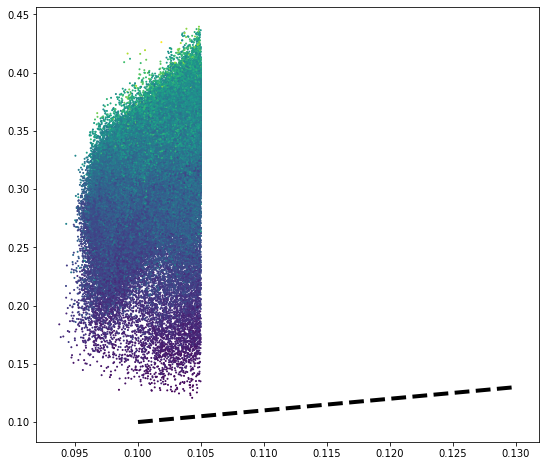

In [104]:
plt.figure(figsize = (9,8))

plt.scatter(ck_a.ravel(), y1.ravel(), c= x.ravel(), s = 1)

plt.plot(np.arange(0.10, 0.4/3, 0.01), np.arange(0.10, 0.4/3, 0.01), linestyle = '--', c = 'k', linewidth = 4.0)

print("lowest albedo: "+str(np.nanmin(y1)), "; lowest clear-sky albedo: "+str(np.nanmin(ck_a)))